# Business Understanding


- Car Evaluation for different features becomes an important tool for recommendation to the users as per their requirements, and needs to be designed as a tool that can help in developing closer relationships between the automobile industry and its customers.
    
- It is useful in identifying cusotmer bases and loyalties as well as can be used for customer segmentation as per needs and income classes.


In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, roc_curve, auc, roc_auc_score
import joblib

In [2]:
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

# Data Understanding

The data contains 1728 rows and 7 columns with descriptions as follows:

- buying: Buying Level or Capacity of the customer (Very High:vhigh, High:high, Low:low, Medium:med)
- maint: Maintainence Level (Very High:vhigh, High:high, Low:low, Medium:med)
- doors: Number of doors in the car (2, 3, 4 and 5 or more)
- lug_boot: Luggage Boot Size in the car (small, med, big)
- safety: Safety Level of Car (high, med, low)
- class: Unacceptable, Acceptable, VeryGood, Good



In [5]:
data = pd.read_csv("../data/car.data", names=columns)
data

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [10]:
data.isna().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [18]:
data.drop_duplicates()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [6]:
data.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

# Data Preparation

## Hypothesis Generation

- A high quality buying level indicates more acceptable level for car evaluation.
- A low maintainence car is more acceptable than others.
- A car with 4 doors is personally preferable and more acceptable than other variants.
- The number of persons should be ideally greater in order to accomodate more people will be more acceptable.
- A bigger boot in the car is more acceptable.
- The safety should be ideally medium to high that would be preferable.
- The classes are unacceptable, acceptable, very good and good as the target variables.

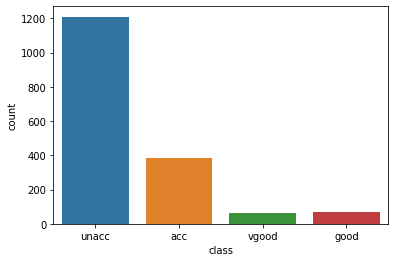

In [19]:
sns.countplot(data['class'])

- The medium buying level cars are most acceptable compared to others, which indicates that the data has a huge sample size from the middle class families that do not want low grade cars, but cannot yet afford very high priced cars either.

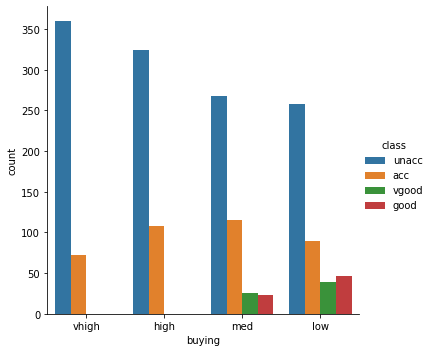

In [20]:
sns.catplot(kind='count', x='buying', hue='class', data=data)

- The preferable maintainence for cars is of mediocre or high costs which is indicative due to the higher selling of the same type of cars in buying level.

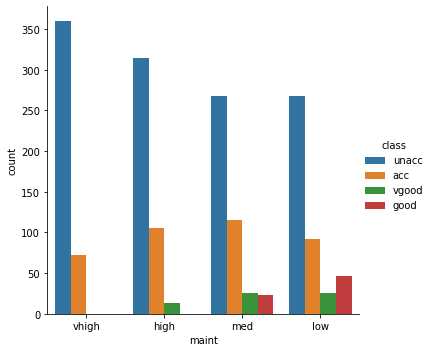

In [21]:
sns.catplot(kind='count', x='maint', hue='class', data=data)

- The number of doors is equivalently distributed between 3,4 to 5 or more cars, and 2 door cars are not preferred.

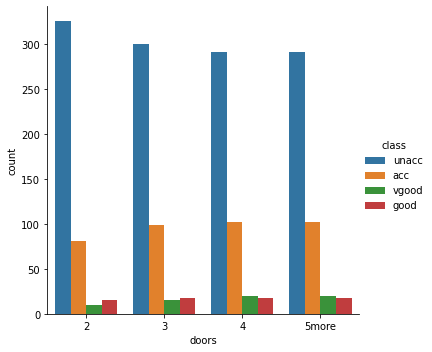

In [22]:
sns.catplot(kind='count', x='doors', hue='class', data=data)

- 4 person cars are most acceptable and ideally not a single user prefers cars with 2 person accomodation as that is essentially a two wheeler.

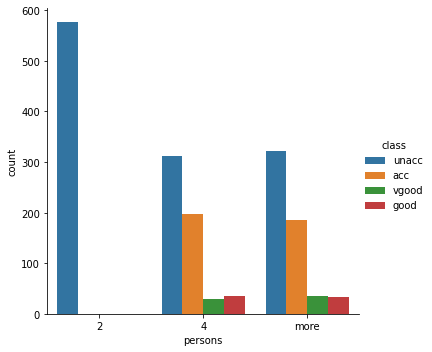

In [23]:
sns.catplot(kind='count', x='persons', hue='class', data=data)

- The big boot sized luggage cars are most acceptable

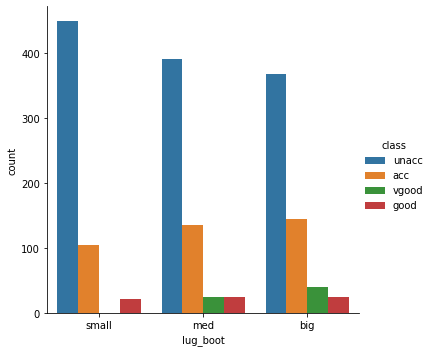

In [24]:
sns.catplot(kind='count', x='lug_boot', hue='class', data=data)

- The high safety vehicles are most preferred which is obvious

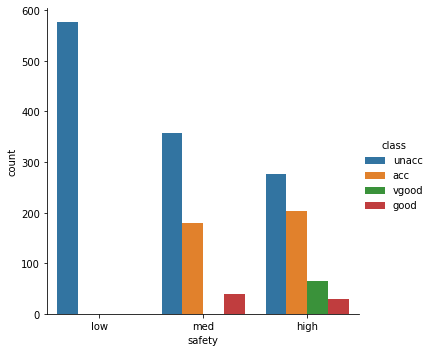

In [15]:
sns.catplot(kind='count', x='safety', hue='class', data=data)

In [25]:
def label(data, feature):
    feature_label_name = {ni: n for n, ni in enumerate(set(data[feature]))}
    return feature_label_name
buying_label = label(data, 'buying')
maint_label = label(data, 'maint')
doors_label = label(data, 'doors')
person_label = label(data, 'persons')
lug_boot_label = label(data, 'lug_boot')
safety_label = label(data, 'safety')
class_label = label(data, 'class')

In [26]:
df1 = data
df1['buying'] = df1['buying'].map(buying_label)
df1['maint'] = df1['maint'].map(maint_label)
df1['doors'] = df1['doors'].map(doors_label)
df1['persons'] = df1['persons'].map(person_label)
df1['lug_boot'] = df1['lug_boot'].map(lug_boot_label)
df1['safety'] = df1['safety'].map(safety_label)
df1['class'] = df1['class'].map(class_label)
df1

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,3,2,0,0,0
1,3,3,3,2,0,1,0
2,3,3,3,2,0,2,0
3,3,3,3,2,1,0,0
4,3,3,3,2,1,1,0
...,...,...,...,...,...,...,...
1723,0,0,0,0,1,1,2
1724,0,0,0,0,1,2,3
1725,0,0,0,0,2,0,0
1726,0,0,0,0,2,1,2


In [76]:
lb = LabelEncoder()
df2 = data
for i in df2.columns:
    df2[i] = lb.fit_transform(df2[i])
    
df2['class'].value_counts()

1    1210
3     384
0      69
2      65
Name: class, dtype: int64

In [27]:
X = df1[['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']]
y = df1['class']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [29]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

Using TensorFlow backend.


After OverSampling, the shape of train_X: (3664, 6)
After OverSampling, the shape of train_y: (3664,) 

After OverSampling, counts of label '1': 916
After OverSampling, counts of label '0': 916


# Modelling and Evaluation

- Random Forest Classifier tuned with Synthetic Minority Oversampling Technique or SMOTE is used to balance the classes as per need.
- The bias in model is removed and boosts the accuracy to over 96% percent
- Grid Search is performed to tune up with Random Forest to determine suitable number of estimators.
- Logistic Regression fails to converge to a good solution with 81 percent accuracy.
- MLP Classifier also converges to a less good solution
- Decision tree is successful with minimum 10-11 estimators, and fails on over 12 estimators.
- Accuracy Score is chosen as the evaluation metric

In [41]:
def classifier(model, X_train_res, X_test, y_train_res, y_test):
    clf = model
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_score = clf.fit(X_train, y_train)
    score = accuracy_score(y_test, y_pred)
    return score, model

In [43]:
score, lr_model = classifier(LogisticRegression(), X_train, X_test, y_train, y_test)

In [44]:
score

0.8125

In [51]:
score, rf = classifier(RandomForestClassifier(n_estimators=100), X_train, X_test, y_train, y_test)

In [52]:
score

0.9652777777777778

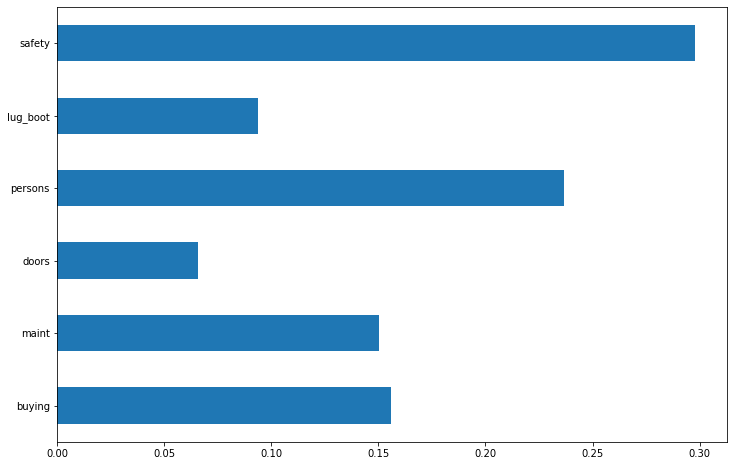

In [57]:
importances = pd.Series(rf.feature_importances_,index=X.columns)
importances.plot(kind='barh', figsize=(12,8))

In [56]:
paramgrid = {'max_depth': list(range(1,20,2)),'n_estimators':list(range(1,200,20))}
grid_search = GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

In [68]:
grid_search.fit(X_train_res, y_train_res)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                                

In [69]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=13, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=141,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [71]:
score, rf = classifier(RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                                              verbose=0, warm_start=False), X_train_res, X_test, y_train_res, y_test)

In [72]:
score

0.9675925925925926

0.6087962962962963


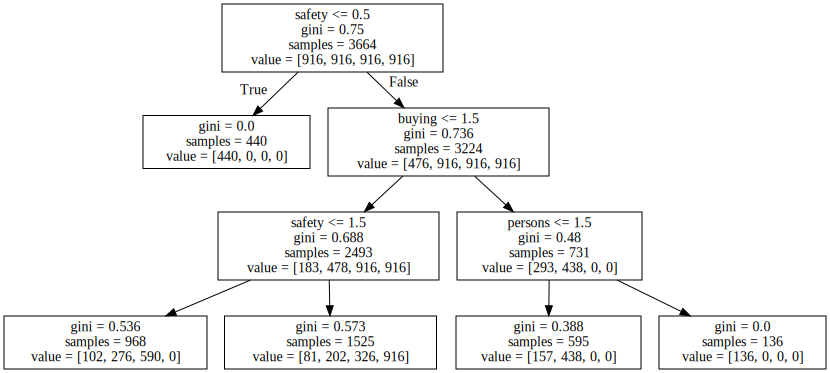

In [67]:
from sklearn import tree
import graphviz
tree_clf = tree.DecisionTreeClassifier(max_depth = 3)
tree_clf.fit(X_train_res,y_train_res)
y_pred = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
dot_data = tree.export_graphviz(tree_clf,feature_names = X.columns.tolist())
graph = graphviz.Source(dot_data)
graph

0.9629629629629629


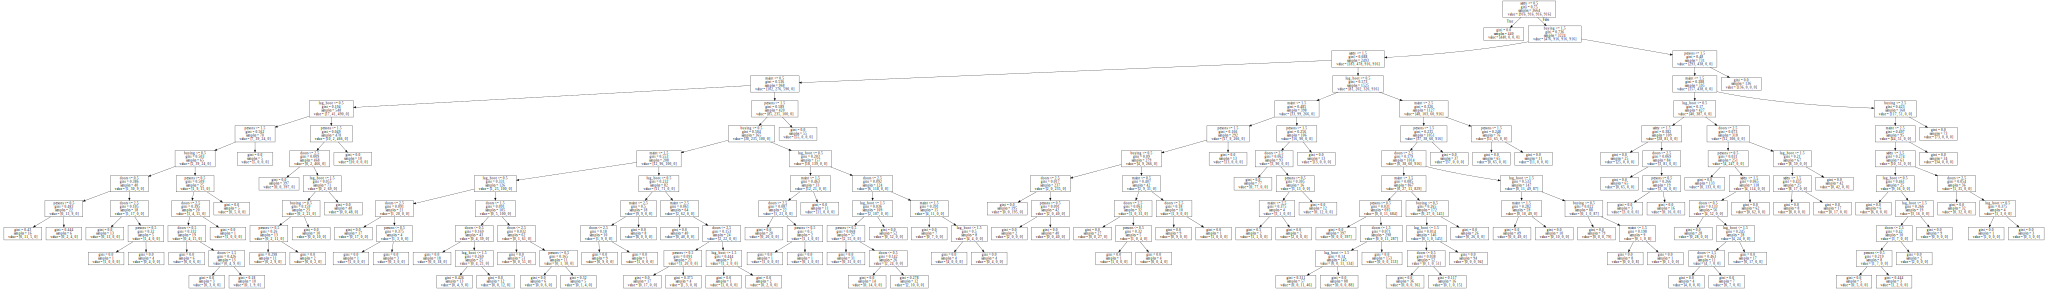

In [78]:
from sklearn import tree
import graphviz
tree_clf = tree.DecisionTreeClassifier(max_depth = 11)
tree_clf.fit(X_train_res,y_train_res)
y_pred = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
dot_data = tree.export_graphviz(tree_clf,feature_names = X.columns.tolist())
graph = graphviz.Source(dot_data)
graph

In [73]:
score, nn = classifier(MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,2)), X_train, X_test, y_train, y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [74]:
score

0.9097222222222222

In [75]:
logit_model = open("logit_model.pkl", "wb")
joblib.dump(lr_model, logit_model)
logit_model.close()

In [76]:
rf_model = open("rf_model.pkl", "wb")
joblib.dump(rf, rf_model)
rf_model.close()

In [77]:
nn_model = open("nn_model.pkl", "wb")
joblib.dump(nn, nn_model)
nn_model.close()

In [79]:
tree_model = open("tree_model.pkl", "wb")
joblib.dump(tree_clf, tree_model)
tree_model.close()